In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy.stats import zscore

In [166]:
df = pd.read_csv("datasetnew3.csv")

In [167]:
df.head

<bound method NDFrame.head of              id                       Model  Year     Company    Price Engine  \
0     200716453            Honda N Box 2018  2018       Honda  3400000   1310   
1     200716455     Honda N WGN Custom 2018  2018       Honda  3800000    658   
2     200716452       Honda S660 Alpha 2017  2017       Honda  3900000    658   
3     200701070  Honda Fit GP5 S Grade 2018  2018       Honda  6200000   1496   
4     200716458       Honda Fit GP5 DX 2018  2018       Honda  6700000   1496   
...         ...                         ...   ...         ...      ...    ...   
1276  200705595                         CK1  1999  Mitsubishi   800000   1200   
1277  200481163                         CB1  1994  Mitsubishi  1280000   1500   
1278  200677384                 Pajero Mini  1999  Mitsubishi  2650000   1500   
1279  200693702                      petrol  2007  Mitsubishi  8100000   4000   
1280  200693703                  CS1 Saloon  2004  Mitsubishi  1925000   1200  

In [168]:
df["Transmission"] = df["Transmission"].astype(str)

In [169]:
df= df[(df['Year']>=1990)&(df['Year']<=2020)]
print(df.Year)

0       2018
1       2018
2       2017
3       2018
4       2018
        ... 
1276    1999
1277    1994
1278    1999
1279    2007
1280    2004
Name: Year, Length: 1242, dtype: int64


Text(0, 0.5, 'Price')

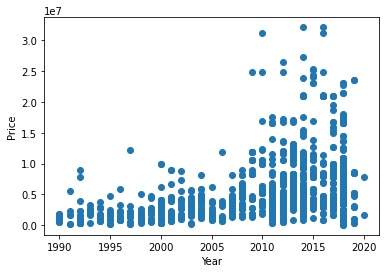

In [170]:
plt.scatter(df['Year'], df['Price'])
plt.xlabel("Year")
plt.ylabel("Price")

In [171]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine          object
FuelType        object
Transmission    object
Age              int64
dtype: object

In [172]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine          object
FuelType        object
Transmission    object
Age              int64
dtype: object

In [173]:
df = df.astype({"Engine": int, "Age": int})

Text(0, 0.5, 'Price')

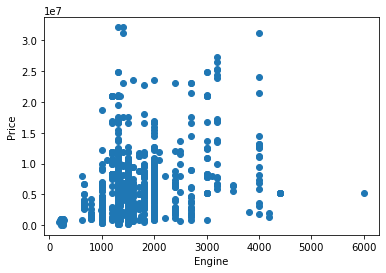

In [174]:
plt.scatter(df['Engine'], df['Price'])
plt.xlabel("Engine")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

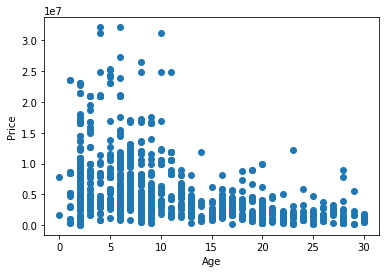

In [175]:
plt.scatter(df['Age'], df['Price'])
plt.xlabel("Age")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

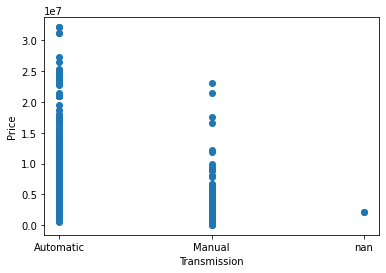

In [176]:
plt.scatter(df['Transmission'], df['Price'])
plt.xlabel("Transmission")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

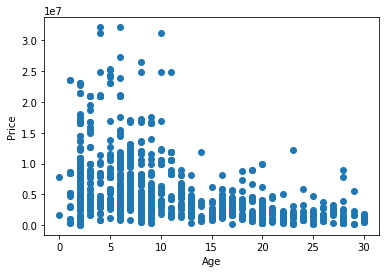

In [177]:
plt.scatter(df['Age'], df['Price'])
plt.xlabel("Age")
plt.ylabel("Price")

In [178]:
df["FuelType"] = df["FuelType"].astype(str)

Text(0, 0.5, 'Price')

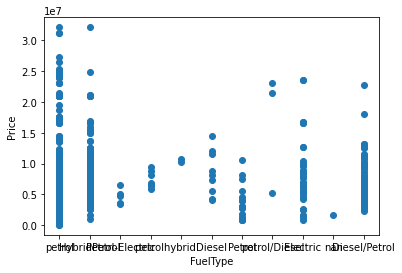

In [179]:
plt.scatter(df['FuelType'], df['Price'])
plt.xlabel("FuelType")
plt.ylabel("Price")

In [180]:
transmission_types = [x for x in df['Transmission'].unique().tolist()]
print(transmission_types)
fuel_types = [x for x in df['FuelType'].unique().tolist()]
print(fuel_types)
tmission_number = 0

for tmission in transmission_types:
  df['Transmission'] = df['Transmission'].replace({str(tmission): str(tmission_number)})
  tmission_number += 1
ftype_number = 0
for ftype in fuel_types:
  df['FuelType'] = df['FuelType'].replace({str(ftype): str(ftype_number)})
  ftype_number += 1
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].fillna(method='ffill')
df['FuelType'] = df['FuelType'].fillna(method='ffill')
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].astype(float).astype(int)
df['FuelType'] = df['FuelType'].astype(float).astype(int)
print(df.dtypes)
print(df['FuelType'].head)
print(df['Transmission'].head)

['Automatic', 'Manual', 'nan']
['petrol', 'HybridPetrol', 'Petrol-Electric', 'petrol ', 'hybrid ', 'Diesel', 'Petrol', 'petrol/Diesel', 'Electric', 'nan', 'Diesel/Petrol']
0
0
0
0
id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int32
FuelType         int32
Transmission     int32
Age              int32
dtype: object
<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       1
       ..
1276    0
1277    0
1278    0
1279    0
1280    0
Name: FuelType, Length: 1242, dtype: int32>
<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       0
       ..
1276    0
1277    0
1278    0
1279    0
1280    0
Name: Transmission, Length: 1242, dtype: int32>


In [181]:
X = df[['Year','Engine','FuelType','Age','Transmission']]
y = df['Price']

In [182]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [183]:
print(X_train) 

      Year  Engine  FuelType  Age  Transmission
516   2018    3000         1    2             0
678   2010    1500         0   10             0
519   2013    2000         1    7             0
1257  2013    3200        10    7             0
744   2016    1500         0    4             0
...    ...     ...       ...  ...           ...
1014  2018    1800         0    2             0
838   2000    1300         0   20             1
787   2014    1300         1    6             0
354   2013    1200         1    7             0
709   2014    1500         0    6             0

[993 rows x 5 columns]


In [184]:
print(X_test)

      Year  Engine  FuelType  Age  Transmission
57    2003    1997         0   17             0
1024  2003    1300         0   17             1
1262  2013    3200        10    7             0
96    2018    1496         1    2             0
170   2013    1200         1    7             1
...    ...     ...       ...  ...           ...
963   2001    1000         0   19             1
958   1998    2000         0   22             1
336   2013    3500         0    7             1
635   1996    1000         0   24             2
20    2018    1997         4    2             0

[249 rows x 5 columns]


In [185]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [186]:
clf.predict(X_test)

array([ 5590886.12574458,  2561712.43249553, 10459888.99098092,
        7616790.2297163 ,  4395591.71494585,  6629825.46066338,
        6780202.78536975,  1171942.31712264,  6186845.5655337 ,
        5988306.97762322,  6577932.70555878,  7576615.68090659,
        7219713.05389547, 10459888.99098092,  8169629.22468489,
        6578276.38161659,  2359786.02874243,  6876181.63572007,
        7582262.04064453,  8983324.87549329,  1770945.89669669,
        6385384.15344411,   -19289.2103399 ,  6637730.36429644,
        4592890.5025124 ,  5349157.5668745 ,  5814873.17333704,
        8568964.94440091,  7762237.92668086, 15418599.11025834,
         771477.32545906,  7233346.12802774,  8226039.06757981,
        5001260.39780903,  6112080.16227674,  5993953.33736116,
         549171.59576857,  6587310.55719721,  5874303.8459323 ,
       10174556.40295583,  6385384.15344411,  7177279.96119058,
        7616790.2297163 ,   377787.96548092,  7233346.12802774,
        1370480.90503305,  8574954.98019

In [187]:
print(y_test)

57       2830000
1024     2840000
1262     5950000
96       7600000
170      6360000
          ...   
963      1375000
958      1790000
336      6450000
635      2075000
20      10250000
Name: Price, Length: 249, dtype: int64


In [188]:
print(clf.score(X_test, y_test))

0.29557326518818117
